# electronic scattering

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Au = nx.Element(element = "Au")

klein = nx.KleinNishinaCrossSection(Au, 14.4125e3)
print(klein)

photo = nx.PhotoCrossSection(Au, 14.4125e3)
print(photo)

elec = nx.ElectronicCrossSection(Au, 14.4125e3)
print(elec)

4.979260700505022e-27
5.847566888130204e-24
5.852546148830709e-24


In [3]:
# Change Nexus calculation method for the atomic scattering factors
nx.SetAtomicScatteringFactorCXRO(False)

# Get method
print(nx.GetAtomicScatteringFactorCXRO())

scat = nx.ElectronicScatteringLength(Au, 14.4125e3, cxro = False)
print(scat)

scat_matrix = nx.ElectronicScatteringLengthMatrix(Au, 14.4125e3, False)
print(scat_matrix)

False
(-2.2007448586170272e-13+3.401635952100459e-14j)
[[-2.20074486e-13+3.40163595e-14j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j -2.20074486e-13+3.40163595e-14j]]


In [9]:
nx.SetAtomicScatteringFactorCXRO(True)
print(nx.GetAtomicScatteringFactorCXRO())

True


In [5]:
detuning  = np.linspace(-100, 100, 5)

Fe = nx.Material.Template(nx.lib.material.Fe)

site = nx.Hyperfine(magnetic_field = 33)

Fe.hyperfine_sites = [site]

nuc_scat = nx.NuclearScatteringLength(Fe, nx.lib.moessbauer.Fe57, detuning)

print(np.squeeze(nuc_scat))

[[[ 7.83414010e-15+6.65456280e-17j -4.84239721e-17+3.34860264e-15j]
  [ 4.84239721e-17-3.34860264e-15j  7.83414010e-15+6.65456280e-17j]]

 [[-4.03270478e-14+4.75658449e-15j -4.69310792e-15-4.81382836e-14j]
  [ 4.69310792e-15+4.81382836e-14j -4.03270478e-14+4.75658449e-15j]]

 [[ 0.00000000e+00+1.05490530e-15j  0.00000000e+00+8.91495773e-15j]
  [ 0.00000000e+00-8.91495773e-15j  0.00000000e+00+1.05490530e-15j]]

 [[ 4.03270478e-14+4.75658449e-15j  4.69310792e-15-4.81382836e-14j]
  [-4.69310792e-15+4.81382836e-14j  4.03270478e-14+4.75658449e-15j]]

 [[-7.83414010e-15+6.65456280e-17j  4.84239721e-17+3.34860264e-15j]
  [-4.84239721e-17-3.34860264e-15j -7.83414010e-15+6.65456280e-17j]]]


In [6]:
material = nx.Material(id = "my_material",
                       composition = [["Fe", 2], ["O", 3]],
                       density = 5.24)


# refractive index at 20 keV
refractive_index = nx.ElectronicRefractiveIndex(material, 20e3)

print(refractive_index)


# grazing indcidence scattering factor at 20 keV

# k-vector along layer direction at an angle of 0.1 degree
kz = nx.conversions.EnergyToKvectorZ(20e3, 0.1)

scattering_factor = nx.ElectronicGrazingScatteringFactor(material, 20e3, kz)
print(scattering_factor)

(0.9999973883454211+4.5329294878545176e-08j)
(-1516637870.2120943+26323590.339101084j)


In [7]:
# scattering matrix at 57-Fe transition energy
mat_Fe = nx.Material.Template(nx.lib.material.Fe_enriched)

site1 = nx.Hyperfine(magnetic_field = 33)

mat_Fe.hyperfine_sites = [site1]

detuning = np.linspace(-100, 100, 5)

scattering_matrix = nx.ForwardScatteringMatrix(mat_Fe, nx.lib.moessbauer.Fe57, detuning)

print(np.squeeze(scattering_matrix))

[[[-4.79377469e+05 +24757.51704119j -3.29906733e+02 +22813.62949622j]
  [ 3.29906733e+02 -22813.62949622j -4.79377469e+05 +24757.51704119j]]

 [[-8.07493885e+05 +56710.19112392j -3.19735833e+04-327960.37172931j]
  [ 3.19735833e+04+327960.37172931j -8.07493885e+05 +56710.19112392j]]

 [[-5.32750529e+05 +31491.09334143j  0.00000000e+00 +60736.54132636j]
  [ 0.00000000e+00 -60736.54132636j -5.32750529e+05 +31491.09334143j]]

 [[-2.58007173e+05 +56710.19112252j  3.19735833e+04-327960.37172931j]
  [-3.19735833e+04+327960.37172931j -2.58007173e+05 +56710.19112252j]]

 [[-5.86123589e+05 +24757.51703838j  3.29906733e+02 +22813.62949622j]
  [-3.29906733e+02 -22813.62949622j -5.86123589e+05 +24757.51703838j]]]


[]

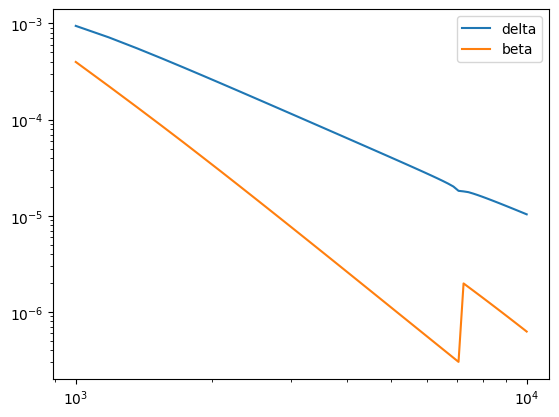

In [8]:
energies = np.linspace(1000, 10000)
refractive_index = []

for elem in energies:
    refractive_index.append(nx.ElectronicRefractiveIndex(material, elem))

plt.loglog(energies, 1 - np.real(refractive_index), label = "delta")
plt.loglog(energies, np.imag(refractive_index), label = "beta")
plt.legend()
plt.plot()